<a href="https://colab.research.google.com/github/ylathan/CarpetaHenry/blob/main/Class_linear_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.data.shape

(506, 13)

##**Regresión Lineal Simple Con Ecuación Normal**

In [63]:
""" Obtener la característica deseada """
data = boston.data[:,5][..., np.newaxis]
print(f"Tamaño de datos: {data.shape}")

""" Obtener las etiquetas """ 
target = boston.target
target = target[...,np.newaxis]
print(f"Tamaño de etiquetas: {target.shape}")

Tamaño de datos: (506, 1)
Tamaño de etiquetas: (506, 1)


In [56]:
""" Imprimir muestras de datos y etiquetas """
print(f"Etiquetas: {target[:10,0]}")#Los 1ros 10 terminos de la columna 0
print(f"Datos: {data[:10,0]}")

Etiquetas: [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]
Datos: [6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004]


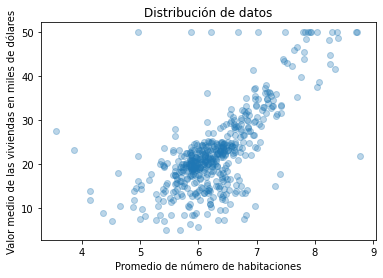

In [64]:
import matplotlib.pyplot as plt

plt.scatter(data, target, alpha=0.3)
plt.title('Distribución de datos')
plt.xlabel('Promedio de número de habitaciones')
plt.ylabel('Valor medio de las viviendas en miles de dólares')
plt.show()

In [65]:
X= data.copy()#toda modificacion de X tambien aplica a data
Y= target.copy()
print(X.shape,Y.shape) #para mostrar como quedaron


(506, 1) (506, 1)


Formula para minimizar el error: $w = (X^{T}X)^{-1}X^{T}Y$

In [66]:
X = np.concatenate((np.ones(X.shape),X), axis= 1 )#esto se hace porque el INTERCEPTO se tiene que multiplicar por 1.y el AXIS es para que me genere otra COLUMNA
#X = np.concatenate(np.ones(506,1)),X))
#X = np.concatenate(np.ones((X.shape[0], X.shape[1])),X))# el 0 pra las filas y el 1 para las columnas


In [23]:
X.shape #aqui puedo ver que tengo 506 datos y 2 columnas

(506, 2)

In [67]:
W = np.linalg.inv(X.T@X) @ X.T@Y


In [68]:
W.shape


(2, 1)

el profesor define
x= data.copy()#para que toda modificacion que usted le haga a X tambien se la haga a data
y= target.copy()
print(x.shape, y.shape)#para mirar que se halla copiado correctamente


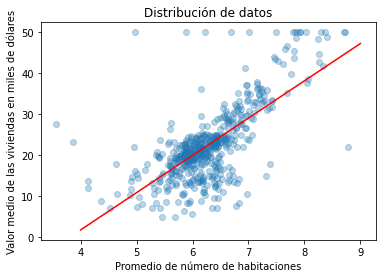

In [70]:
plt.scatter(X[:,1],Y[:,0], alpha=0.3)
plt.title('Distribución de datos')
plt.xlabel('Promedio de número de habitaciones')
plt.ylabel('Valor medio de las viviendas en miles de dólares')
plt.plot([4,9], [W[0,0] + W[1,0]*4,W[0,0] + W[1,0]*9], color= "red")
plt.show()

## **Regresión lineal con ecuación no vectorizada**

$W_1 = \frac{(\sum x_i^{2}) * \sum y_i - (\sum x_i) * (\sum x_iy_i))} {n * (\sum x_i^2) - (\sum x_i)^2}$

$W_0 = \frac{n (\sum x_i y_i) - (\sum x_i)(\sum y_i)} {n * (\sum x_i^2) - (\sum x_i)^2}$

##**Regresión Lineal Con Sklearn**

In [31]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression().fit(data, target)
print("W1:" , reg_model.coef_)
print("W0: ", reg_model.intercept_)

W1: [[ 8.40158122 -0.07277679]]
W0:  [-25.27739905]


In [30]:
""" Obtener la característica deseada """
data = boston.data[:,5:7]
print(f"Tamaño de datos: {data.shape}")

""" Obtener las etiquetas """ 
target = boston.target
target = target[...,np.newaxis]
print(f"Tamaño de etiquetas: {target.shape}")

Tamaño de datos: (506, 2)
Tamaño de etiquetas: (506, 1)


In [29]:
X = np.concatenate((data, np.ones((506,1))), axis=-1)
Y = target.copy()
print(f"Tamaño de datos: {X.shape}")

Tamaño de datos: (506, 2)


In [44]:
W = np.linalg.inv(X.T@X) @ X.T@Y
print(W.T)

[[ 4.87983895 -0.11507156]]


In [45]:
reg_model = LinearRegression().fit(data, target)
print("W1:" , reg_model.coef_)
print("W0: ", reg_model.intercept_)

W1: [[ 8.40158122 -0.07277679]]
W0:  [-25.27739905]


In [33]:
import pandas as pd
name_cols = ["Promedio_Numero_Habitaciones", "Distancia_Casa_Centro_Empleo", "Precio en Dolares"]
df = pd.DataFrame(np.concatenate([data,target],1), columns=name_cols)
print(df)

     Promedio_Numero_Habitaciones  Distancia_Casa_Centro_Empleo  \
0                           6.575                          65.2   
1                           6.421                          78.9   
2                           7.185                          61.1   
3                           6.998                          45.8   
4                           7.147                          54.2   
..                            ...                           ...   
501                         6.593                          69.1   
502                         6.120                          76.7   
503                         6.976                          91.0   
504                         6.794                          89.3   
505                         6.030                          80.8   

     Precio en Dolares  
0                 24.0  
1                 21.6  
2                 34.7  
3                 33.4  
4                 36.2  
..                 ...  
501               22

In [34]:
X = df[['Promedio_Numero_Habitaciones', 'Distancia_Casa_Centro_Empleo']].to_numpy()
y = df['Precio en Dolares'].to_numpy()

In [35]:
# Create a mesh grid on which we will run our model
x_min, x_max = X[0].min(), X[0].max()
y_min, y_max = X[1].min(), X[1].max()
xrange = np.arange(x_min, x_max, 0.02)
yrange = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = reg_model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Generate the plot
fig = px.scatter_3d(df, x='Promedio_Numero_Habitaciones', y='Distancia_Casa_Centro_Empleo', z='Precio en Dolares')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface', opacity=0.6))
fig.show()